# **Table of Contents**
* [Part 1 - Intro](#section_11)
* [Part 2 - EDA](#section_12)
* [Part 3 - Nan](#section_13)
* [Part 4 - Encode , Impute , Transform](#section_14)
* [Part 5 - Feature Selection](#section_15)
* [Part 6 - Model Building](#section_16)
* [Part 7 - Submission](#section_17)

In [1]:
import  numpy              as np
import  pandas             as pd
import  matplotlib.pyplot  as plt
import  seaborn            as sns

import warnings
warnings.filterwarnings("ignore")

<a id='section_11'></a>
# **Part 1 - Intro**

## **1.1 - Read**

In [2]:
train = pd.read_csv ('datasets/Vehicle_loan_default_train.csv')

test  = pd.read_csv ('datasets/Vehicle_loan_default_test.csv')

In [3]:
train.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [4]:
train.drop ('ID' , axis=1 , inplace=True)
test.drop  ('ID' , axis=1 , inplace=True)

In [5]:
data_info  = pd.read_excel ('datasets/info/Vehicle_Loan_Default_dict.csv')
data_info

,Client_Income,Client Income in $
0,Car_Owned,Any Car owned by client before applying for th...
1,Bike_Owned,Any bike owned by client (0 means No and 1 mea...
2,Active_Loan,Any other active loan at the time of aplicatio...
3,House_Own,Any house owned by client (0 means No and 1 me...
4,Child_Count,Number of children the client has
5,Credit_Amount,Credit amount of the loan in $
6,Loan_Annuity,Loan annuity in $
7,Accompany_Client,Who accompanied the client when client applied...
8,Client_Income_Type,Clients income type
9,Client_Education,Highest level of education ahieved by client


In [6]:
print ( train.shape )
print ( test.shape  )

(121856, 39)
(80900, 38)


## **1.2 - Col info**

In [7]:
print ( train.info () )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Client_Income               118249 non-null  object 
 1   Car_Owned                   118275 non-null  float64
 2   Bike_Owned                  118232 non-null  float64
 3   Active_Loan                 118221 non-null  float64
 4   House_Own                   118195 non-null  float64
 5   Child_Count                 118218 non-null  float64
 6   Credit_Amount               118224 non-null  object 
 7   Loan_Annuity                117044 non-null  object 
 8   Accompany_Client            120110 non-null  object 
 9   Client_Income_Type          118155 non-null  object 
 10  Client_Education            118211 non-null  object 
 11  Client_Marital_Status       118383 non-null  object 
 12  Client_Gender               119443 non-null  object 
 13  Loan_Contract_

In [8]:
train.nunique()

Client_Income                  1516
Car_Owned                         2
Bike_Owned                        2
Active_Loan                       2
House_Own                         2
Child_Count                      14
Credit_Amount                  6816
Loan_Annuity                  16680
Accompany_Client                  7
Client_Income_Type                8
Client_Education                  5
Client_Marital_Status             4
Client_Gender                     3
Loan_Contract_Type                2
Client_Housing_Type               6
Population_Region_Relative      164
Age_Days                      22583
Employed_Days                 13220
Registration_Days             19254
ID_Days                        9655
Own_House_Age                    55
Mobile_Tag                        2
Homephone_Tag                     2
Workphone_Working                 2
Client_Occupation                18
Client_Family_Members            15
Cleint_City_Rating                3
Application_Process_Day     

<a id='section_12'></a>
# **Part 2 - EDA**

##  **2.1 - Univariate Analysis**

###  **2.1.1 - For Categorical Features**

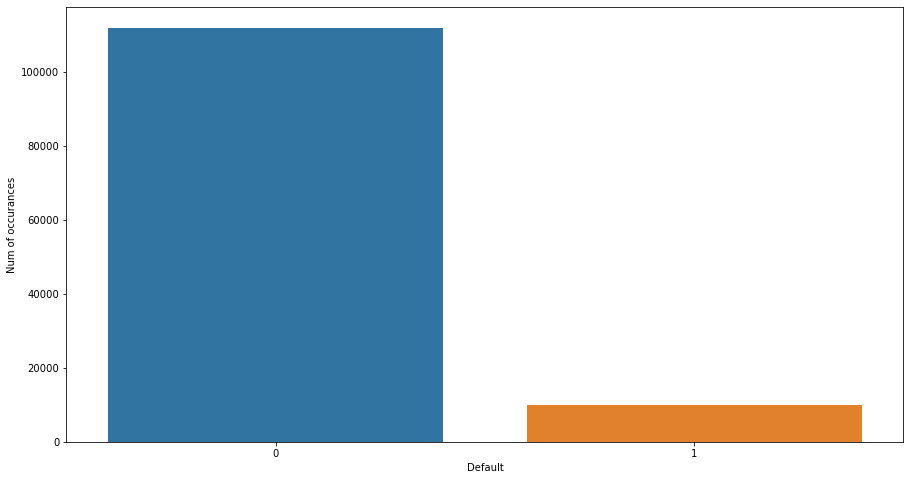

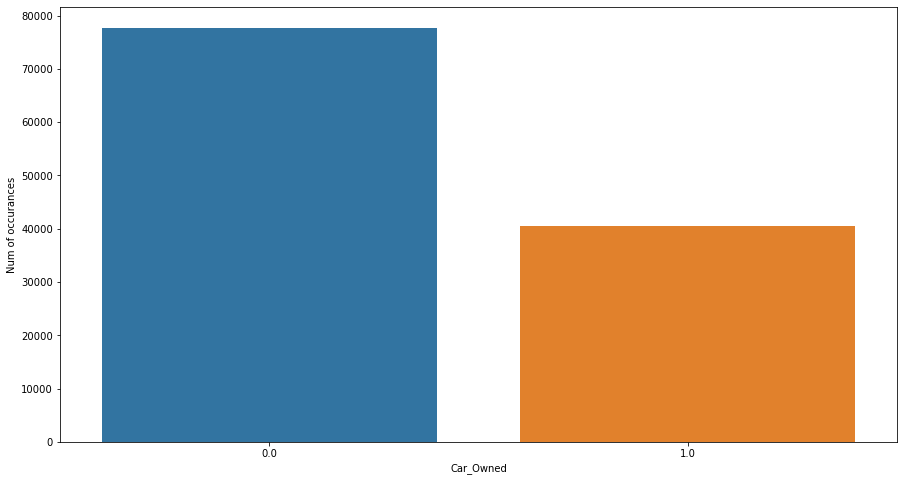

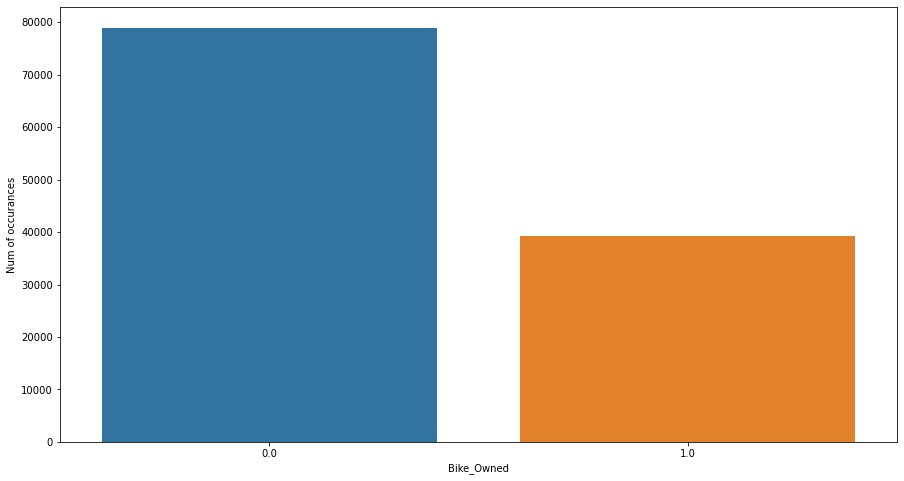

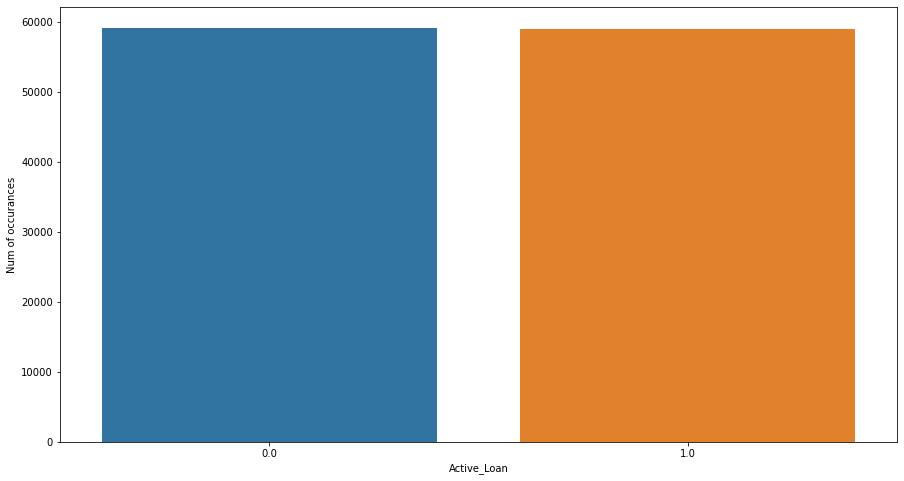

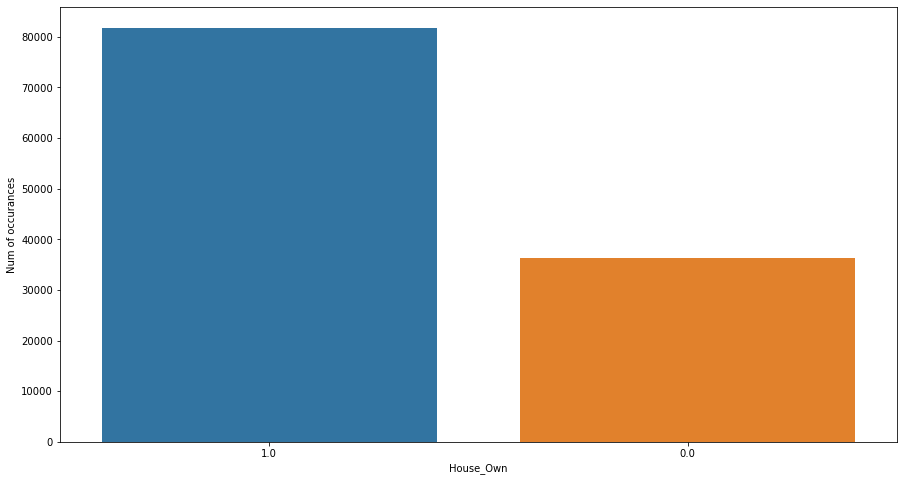

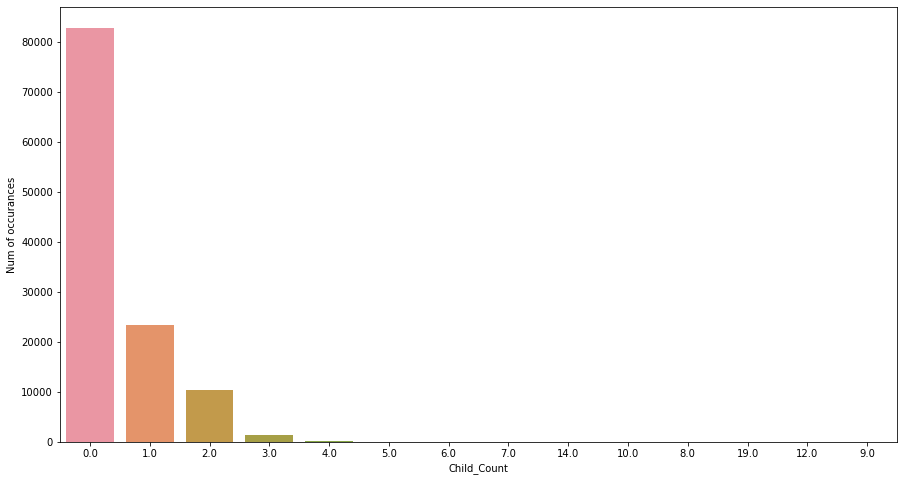

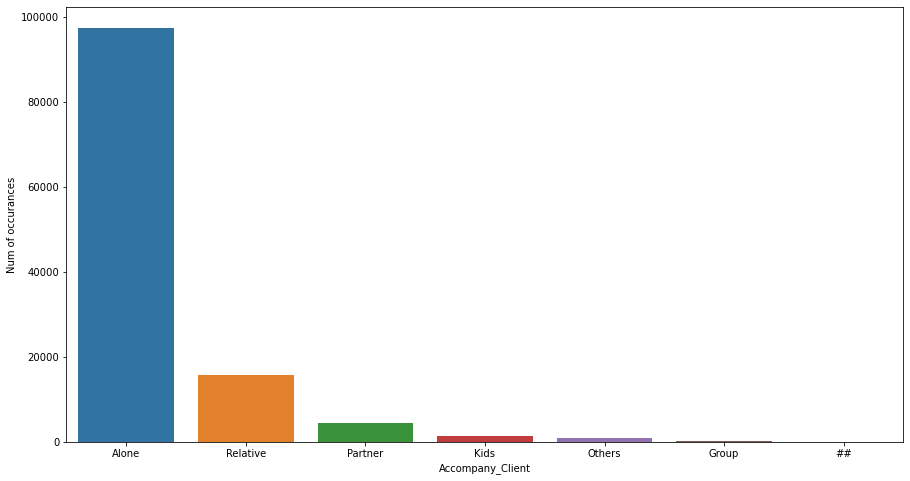

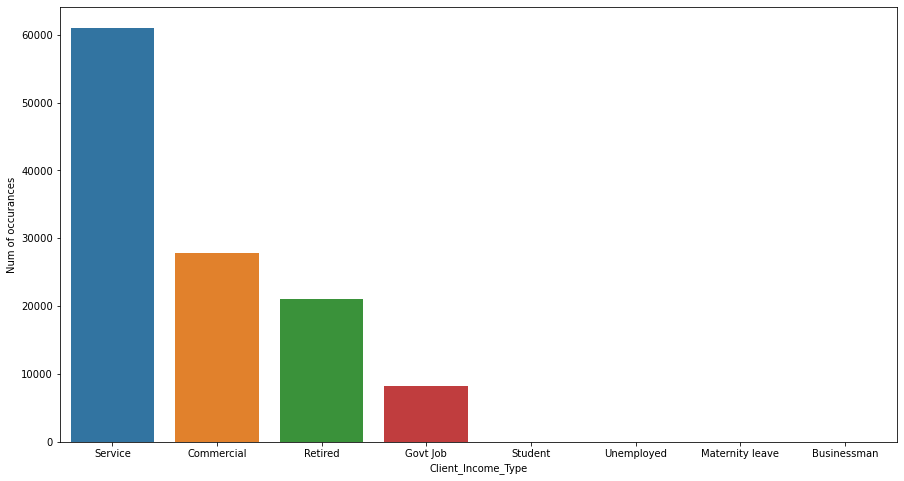

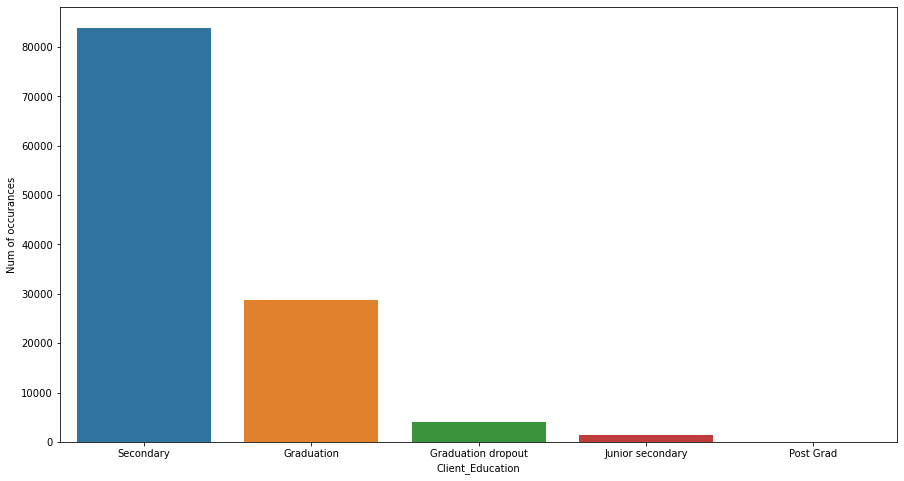

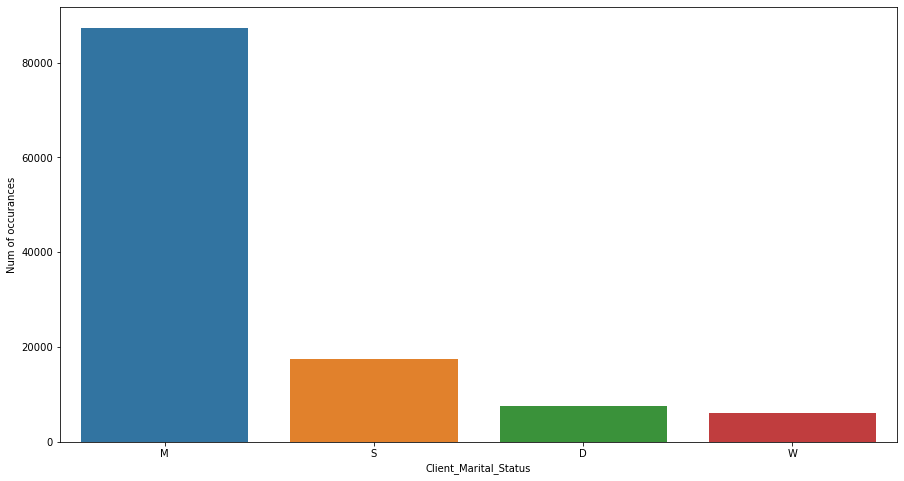

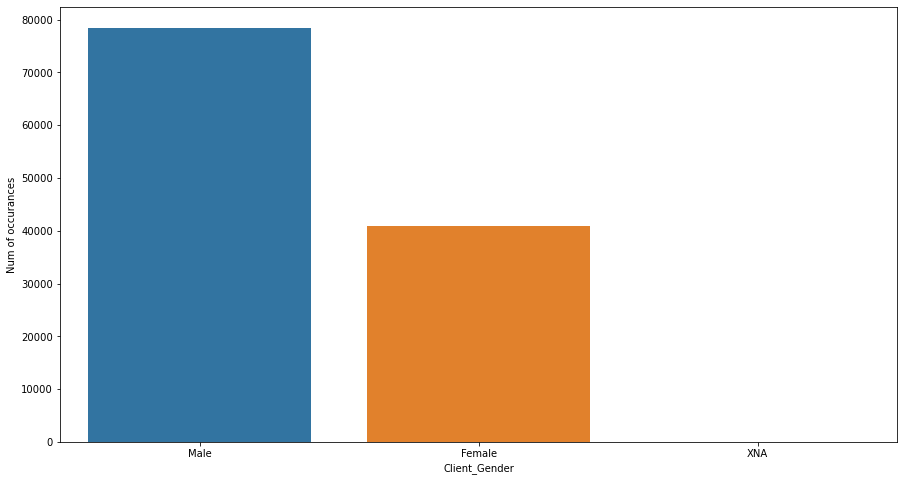

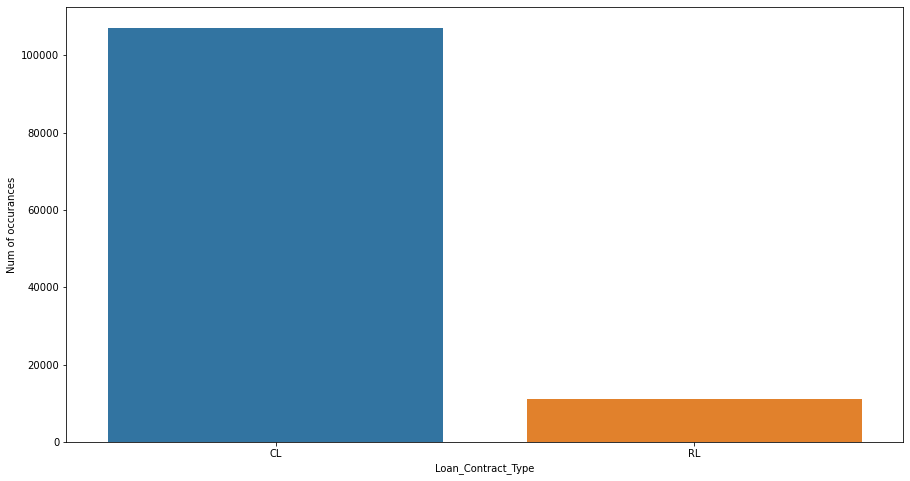

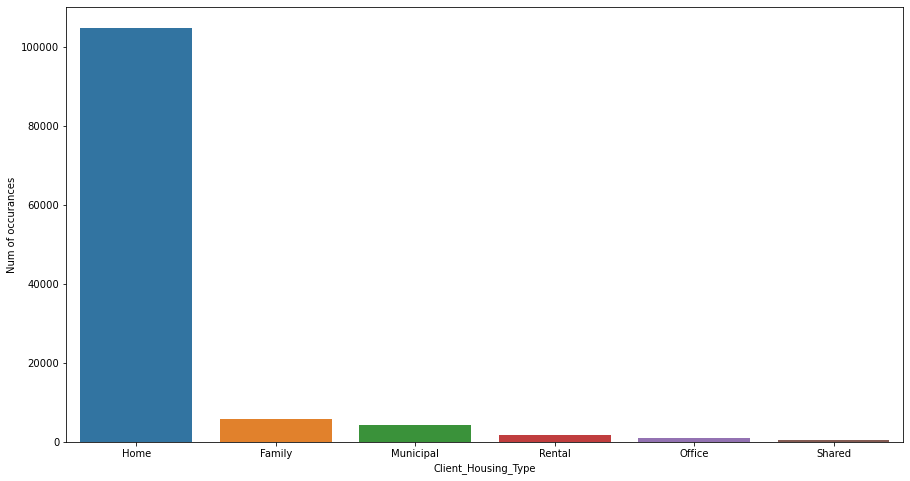

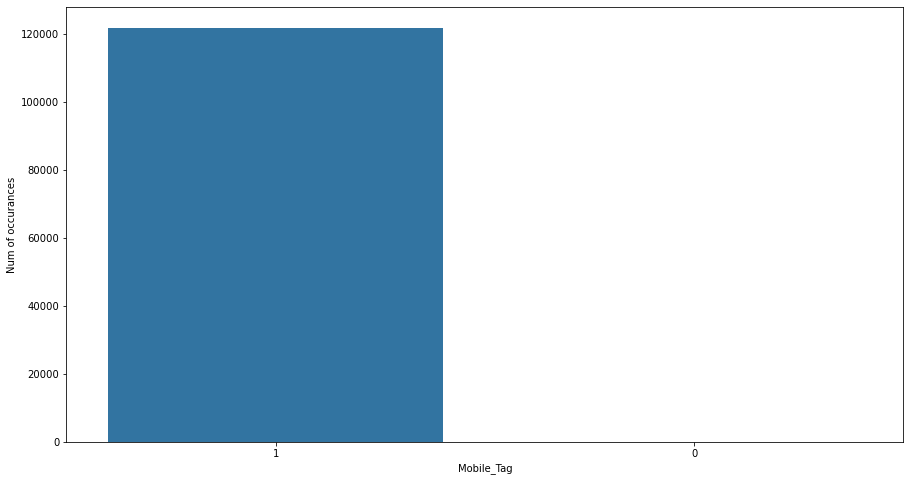

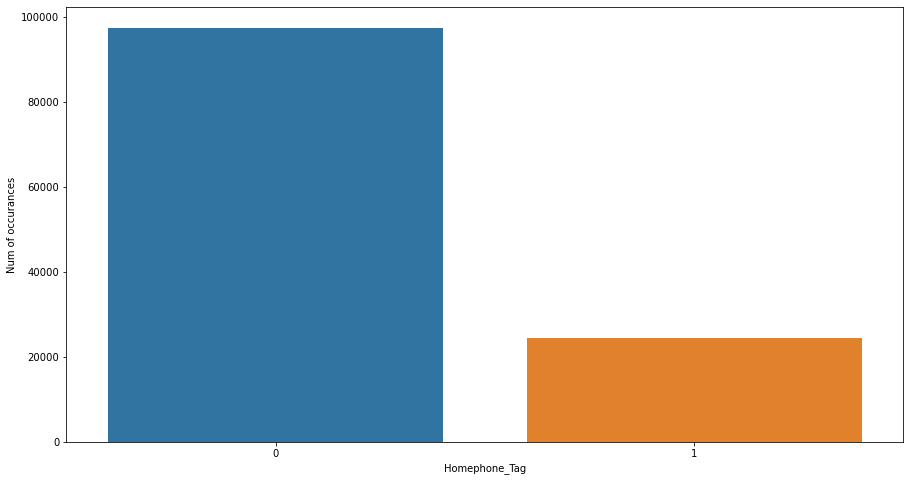

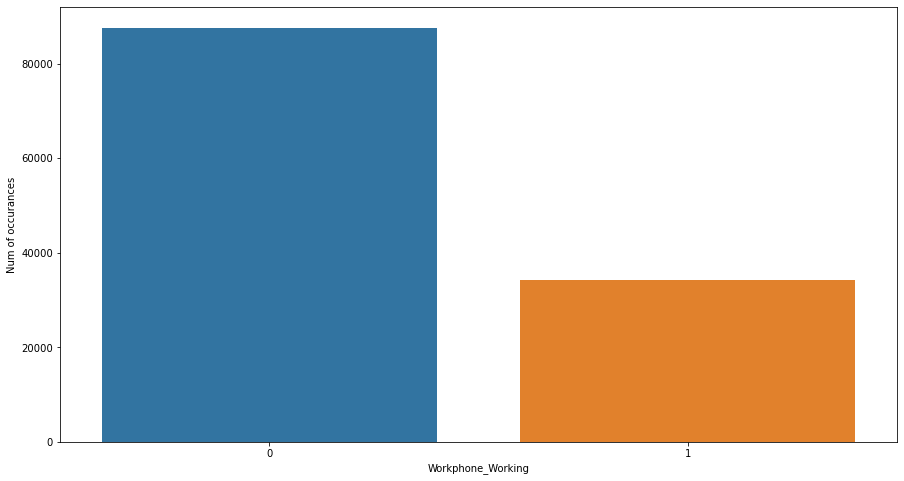

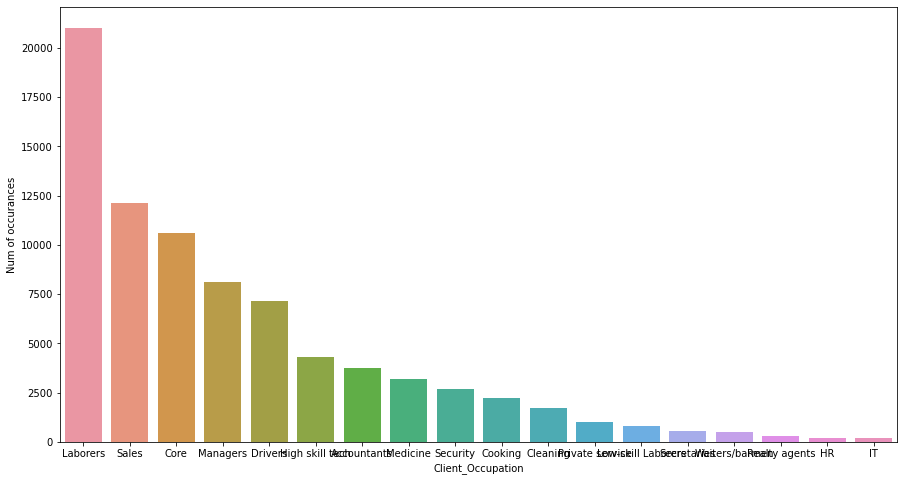

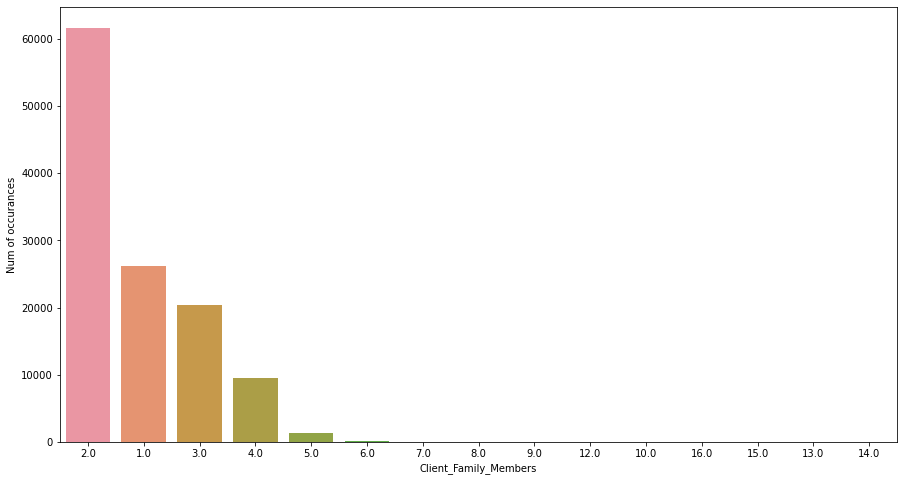

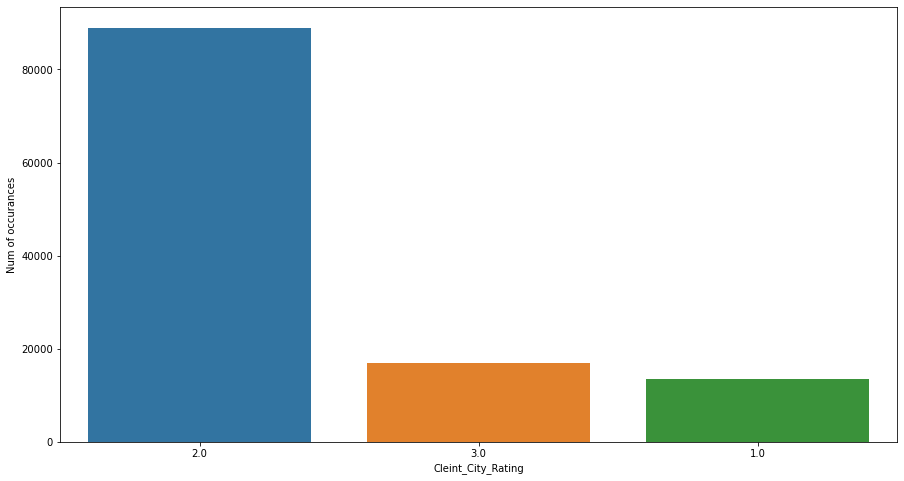

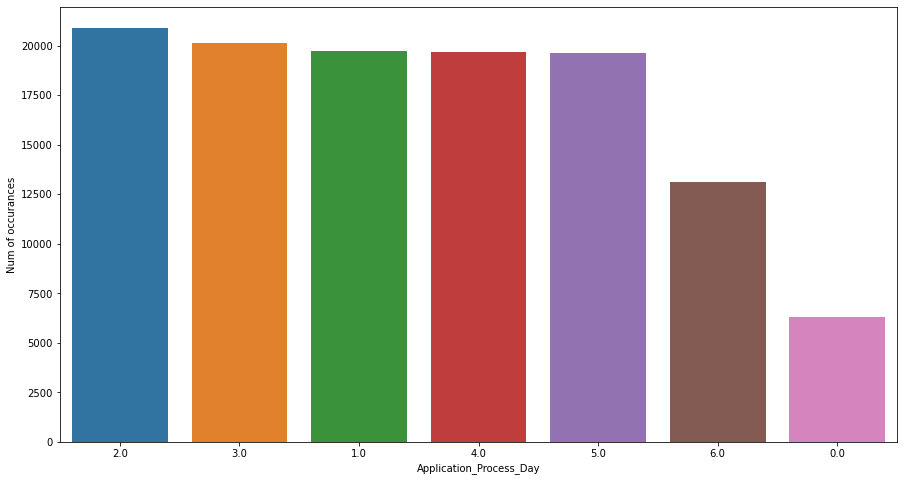

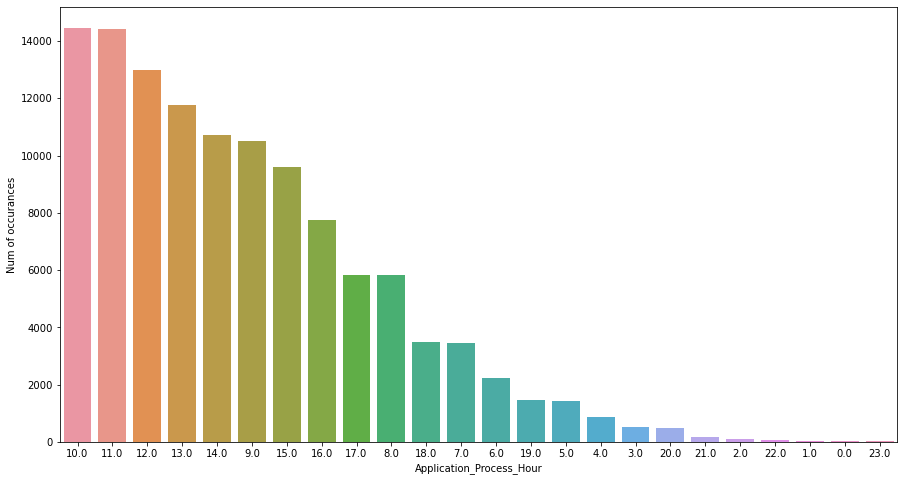

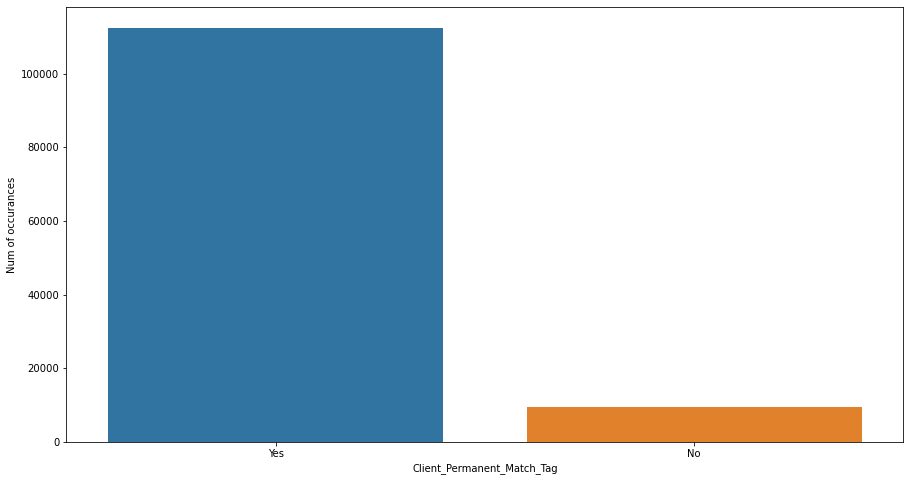

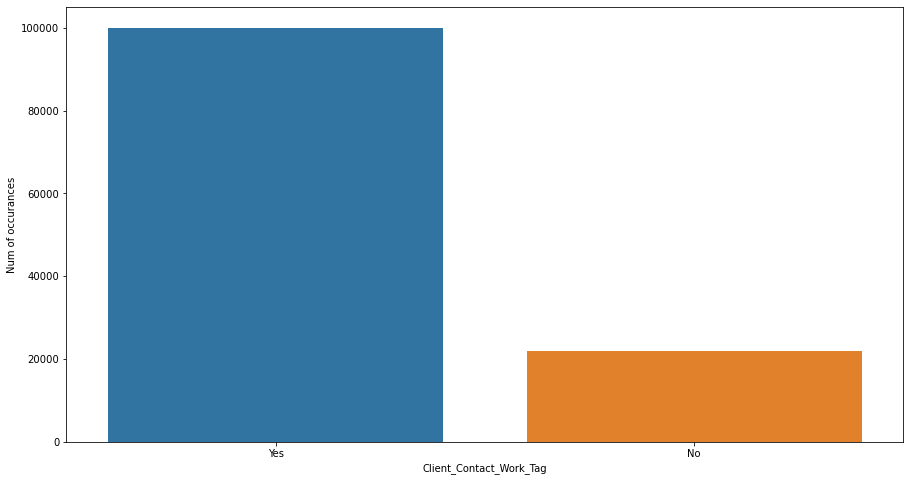

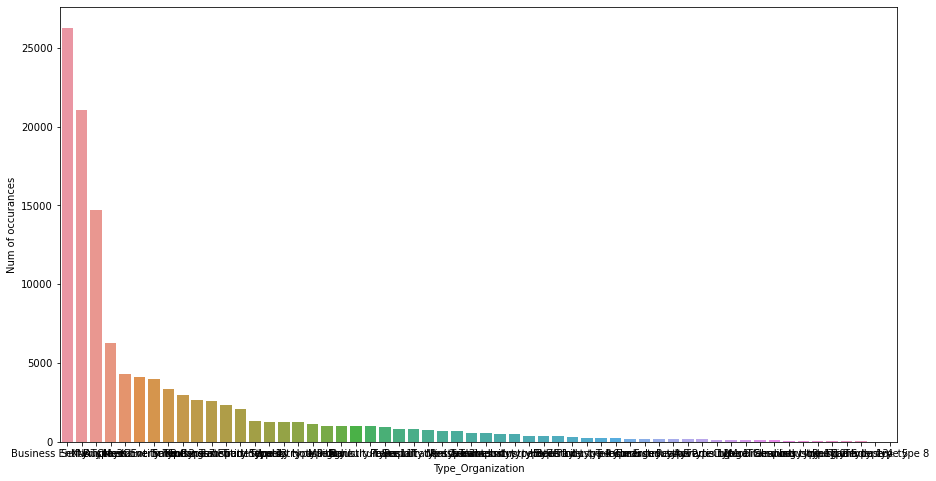

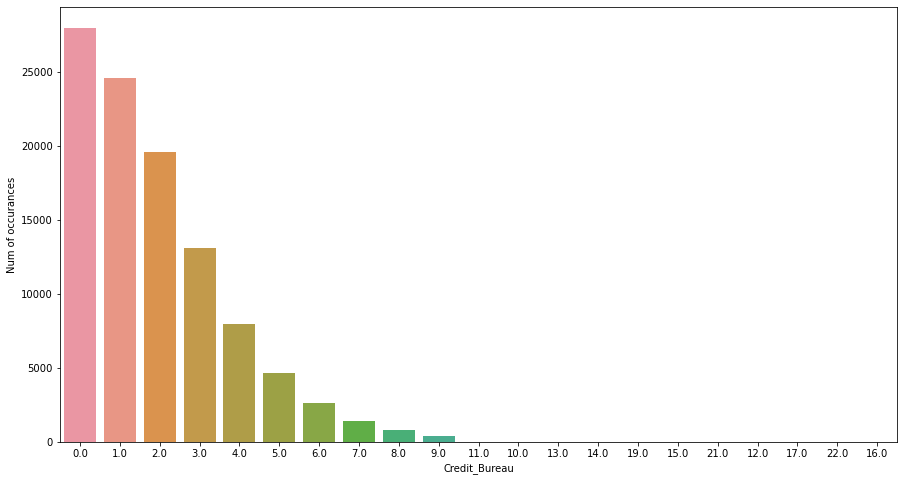

In [9]:
for i in [ 'Default'                 ,  'Car_Owned'              ,  'Bike_Owned'          , 'Active_Loan'  ,        
           'House_Own'               ,  'Child_Count'            ,  'Accompany_Client'    , 'Client_Income_Type' ,   
           'Client_Education'        ,  'Client_Marital_Status'  ,  'Client_Gender'       ,  'Loan_Contract_Type', 
           'Client_Housing_Type'     ,  'Mobile_Tag'             ,  'Homephone_Tag'       , 
           'Workphone_Working'       ,  'Client_Occupation'      ,  'Client_Family_Members' , 
           'Cleint_City_Rating'      ,  'Application_Process_Day',  'Application_Process_Hour',  
           'Client_Permanent_Match_Tag' , 'Client_Contact_Work_Tag' , 'Type_Organization' , 'Credit_Bureau'     ]:
    
    vc = train[i].value_counts()

    plt.figure (figsize=(12,5))
    
    sns.barplot (x =vc.index.values, y =vc.values, order =vc.index)
    
    plt.xlabel (i)
    plt.ylabel ('Num of occurances')

### **Data Mods**

In [10]:
train.drop ('Mobile_Tag', axis=1 , inplace=True)
test .drop ('Mobile_Tag', axis=1 , inplace=True)

In [ ]:
train['Child_Count']                .replace ( [4.0,5.0,6.0,7.0,8.0,9.0,10.0,12.0,14.0,19.0]   ,           
                                                3.0   , inplace=True )

train['Accompany_Client']           .replace ( ['Kids','Group','##']  ,                                    
                                                'Others'  , inplace=True )

train['Client_Income_Type']         .replace ( ['Student','Unemployed','Maternity leave', 'Businessman']  ,
                                                 'Others'  , inplace=True )

train['Client_Education']          .replace  ( ['Graduation dropout' , 'Junior secondary', 'Post Grad' ]  ,
                                                'Others'  , inplace=True )

train['Client_Gender']             .replace  ( ['XNA'] ,                                                    
                                                'Male'    , inplace=True )

train['Client_Housing_Type']       .replace  ( ['Rental' , 'Office', 'Shared' ]  ,                         
                                               'Others'  , inplace=True )


train['Client_Family_Members']     .replace  ( [6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0]   ,        
                                                5.0    , inplace=True )

train['Application_Process_Day']   .replace  ( [1.0,2.0,3.0,4.0,5.0]  ,                                       
                                               'Weekday' , inplace=True )

train['Application_Process_Day']   .replace  ( [0.0,6.0]  ,                                                   
                                               'Weekend' , inplace=True )

train['Application_Process_Hour']  .replace  ( [8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0]    ,    
                                               'Working' , inplace=True )

train['Application_Process_Hour']  .replace  ( [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,18.0,19.0,20.0,21.0,22.0,23.0] ,
                                               'NonWorking' , inplace=True)


train['Type_Organization']         .replace   ( ['XNA']    ,                                                
                                                np.nan    , inplace=True )


train['Credit_Bureau']    .replace (  [8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0] ,
                                       8.0 , inplace=True )

In [ ]:
test ['Child_Count']                .replace ( [4.0,5.0,6.0,7.0,8.0,9.0,10.0,12.0,14.0,19.0]   ,           
                                                3.0   , inplace=True )

test ['Accompany_Client']           .replace ( ['Kids','Group','##']  ,                                    
                                                'Others'  , inplace=True )

test ['Client_Income_Type']         .replace ( ['Student','Unemployed','Maternity leave', 'Businessman']  ,
                                                 'Others'  , inplace=True )

test ['Client_Education']          .replace  ( ['Graduation dropout' , 'Junior secondary', 'Post Grad' ]  ,
                                                'Others'  , inplace=True )

test ['Client_Gender']             .replace  ( ['XNA'] ,                                                    
                                                'Male'    , inplace=True )

test ['Client_Housing_Type']       .replace  ( ['Rental' , 'Office', 'Shared' ]  ,                         
                                               'Others'  , inplace=True )


test ['Client_Family_Members']     .replace  ( [6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0]   ,        
                                                5.0    , inplace=True )

test ['Application_Process_Day']   .replace  ( [1.0,2.0,3.0,4.0,5.0]  ,                                       
                                               'Weekday' , inplace=True )

test ['Application_Process_Day']   .replace  ( [0.0,6.0]  ,                                                   
                                               'Weekend' , inplace=True )

test ['Application_Process_Hour']  .replace  ( [8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0]    ,    
                                               'Working' , inplace=True )

test ['Application_Process_Hour']  .replace  ( [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,18.0,19.0,20.0,21.0,22.0,23.0] ,
                                               'NonWorking' , inplace=True)


test ['Type_Organization']         .replace   ( ['XNA']    ,                                                
                                                np.nan    , inplace=True )


test ['Credit_Bureau']    .replace (  [8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0] ,
                                       8.0 , inplace=True )

### **2.1.2 - For Numeric Feature**

In [13]:
train.replace ({'$':np.nan  , '#VALUE!':np.nan  , '@':np.nan , '#':np.nan , 'x':np.nan , '&':np.nan} , inplace=True)
test.replace  ({'$':np.nan  , '#VALUE!':np.nan  , '@':np.nan , '#':np.nan , 'x':np.nan , '&':np.nan} , inplace=True)

In [14]:
for i in [  'Client_Income'   , 'Credit_Amount'  , 'Loan_Annuity'       , 'Population_Region_Relative' , 
            'Age_Days'        , 'Employed_Days'  , 'Registration_Days'  , 'ID_Days'                    , 
            'Score_Source_1'  , 'Score_Source_2' , 'Score_Source_3'     , 'Social_Circle_Default'      ,  
            'Phone_Change' ]:
    
    train[i]  =  train[i].astype('float64')
    test [i]  =  test [i].astype('float64')

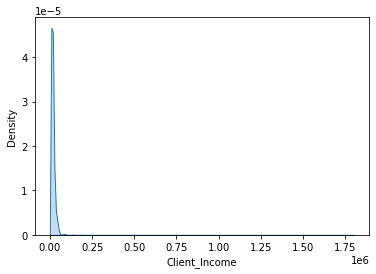

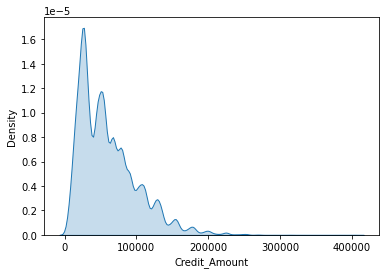

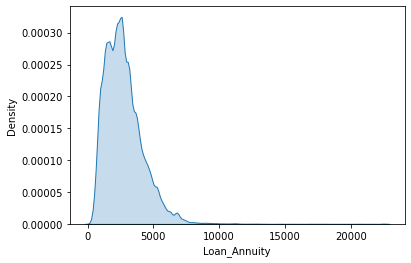

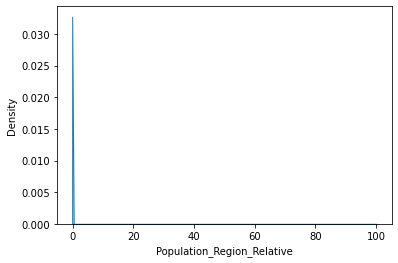

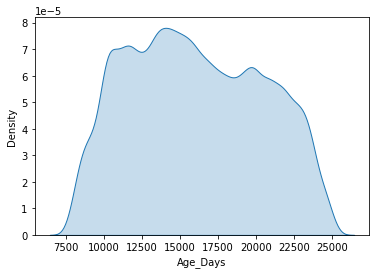

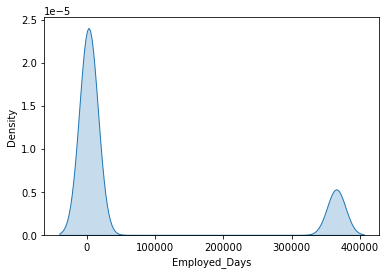

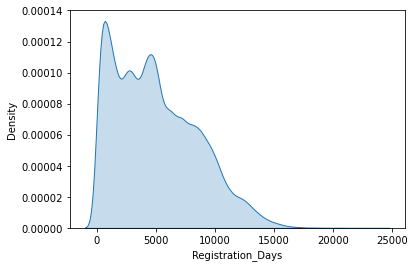

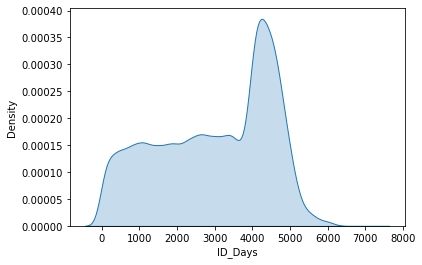

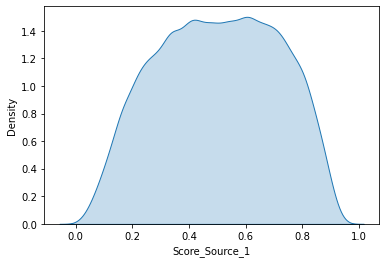

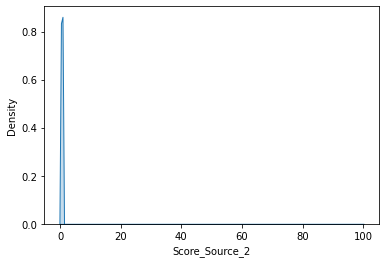

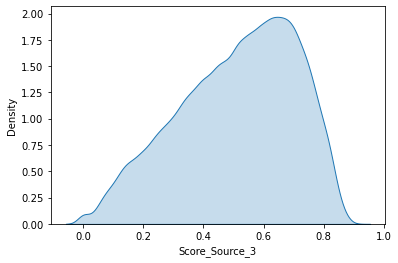

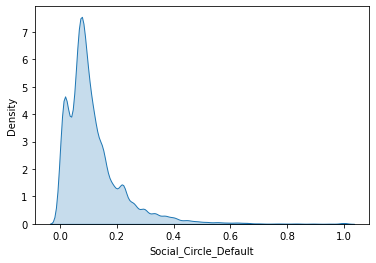

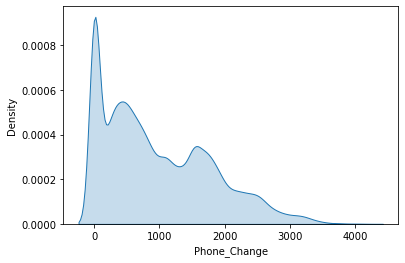

In [15]:
for i in [  'Client_Income'   , 'Credit_Amount'  , 'Loan_Annuity'       , 'Population_Region_Relative' , 
            'Age_Days'        , 'Employed_Days'  , 'Registration_Days'  , 'ID_Days'                    , 
            'Score_Source_1'  , 'Score_Source_2' , 'Score_Source_3'     , 'Social_Circle_Default'      ,  
            'Phone_Change' ]:
    
    sns.kdeplot ( train[i] , shade=True )
    plt.show()

## **2.2 - Bivariate Analysis**

### **2.2.1 - Categorical Cols**

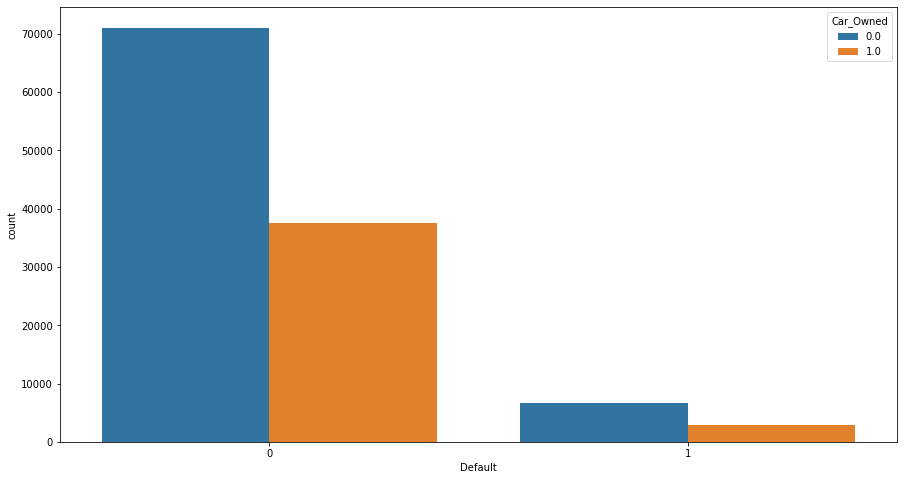

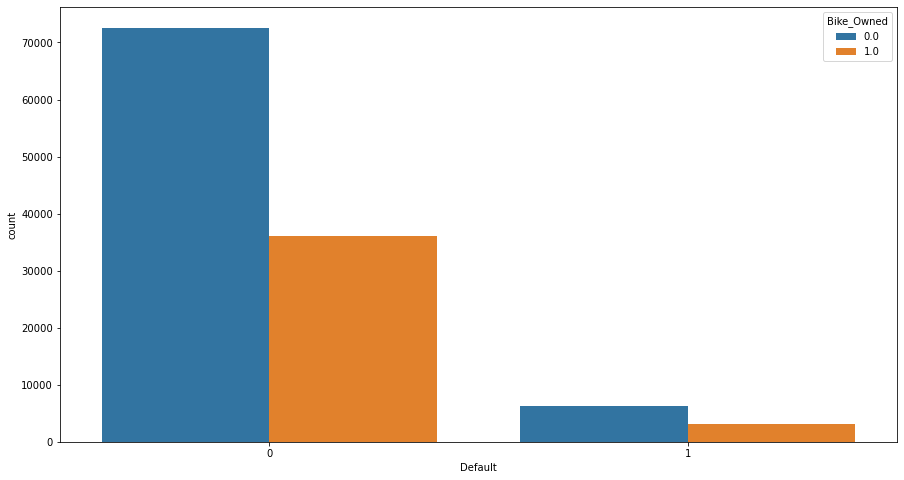

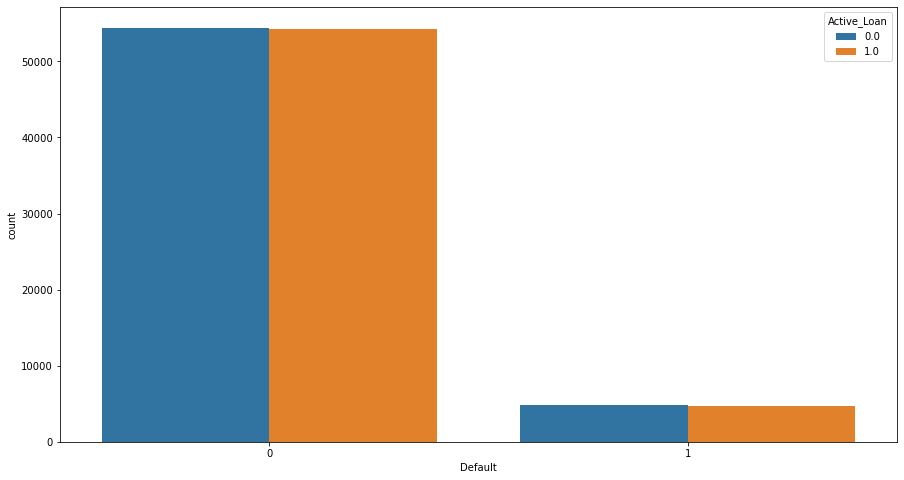

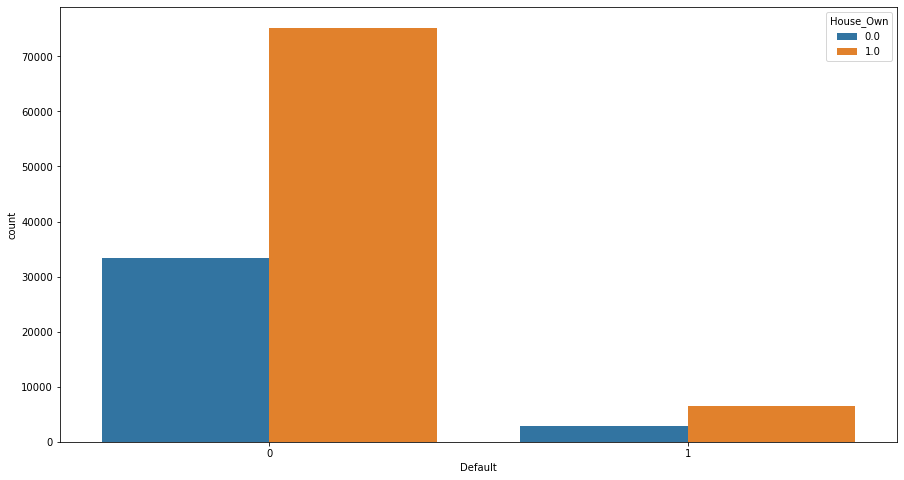

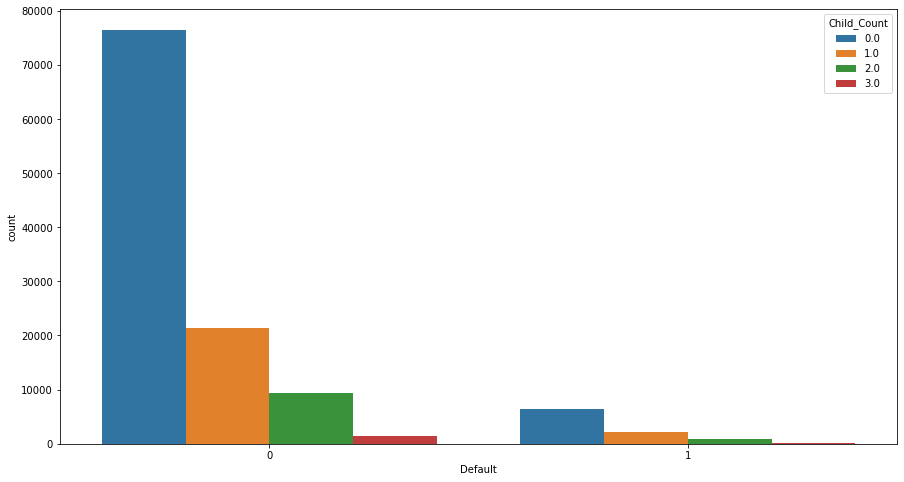

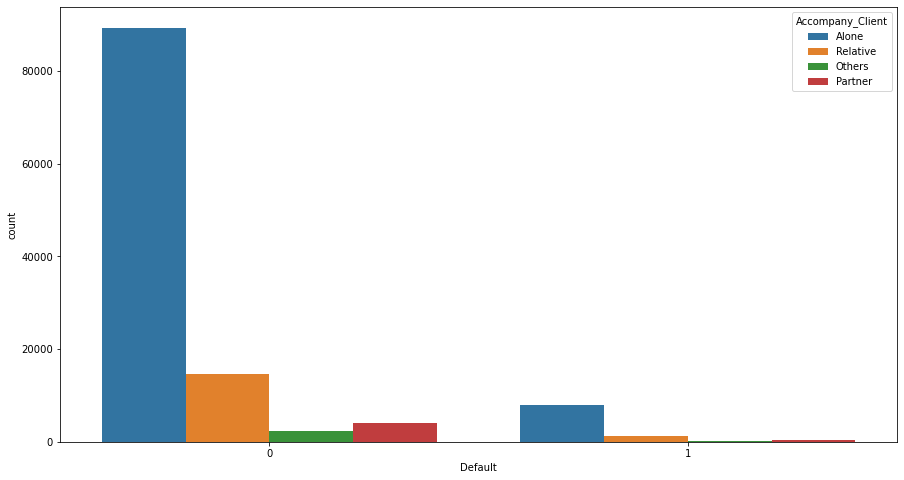

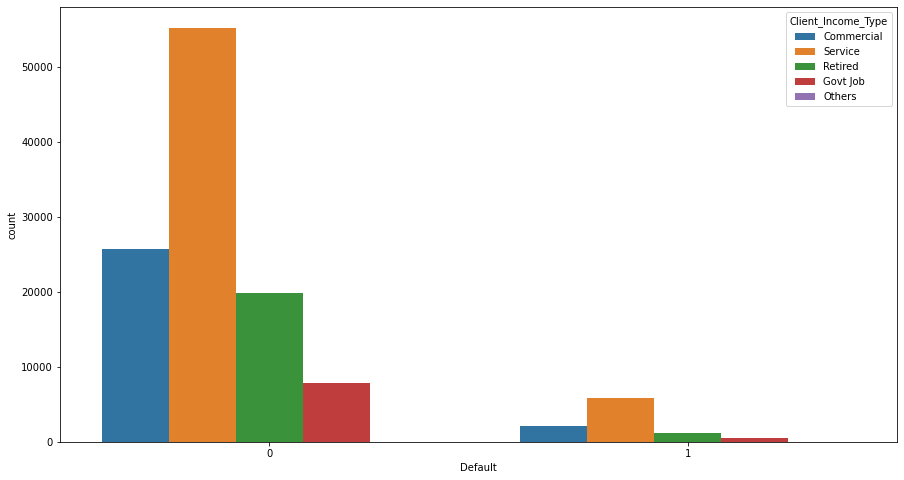

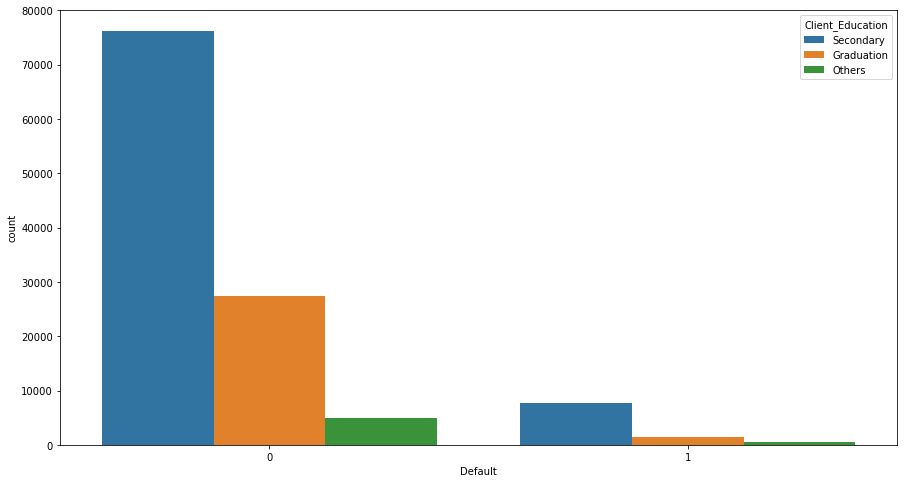

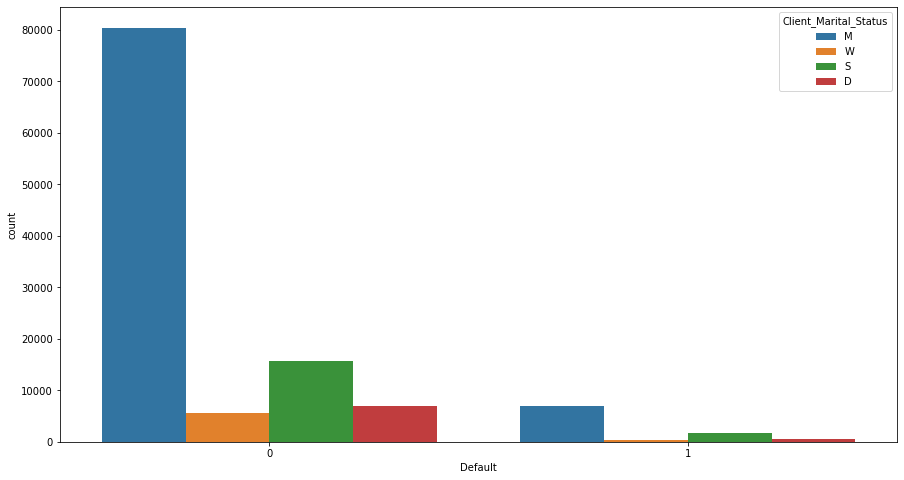

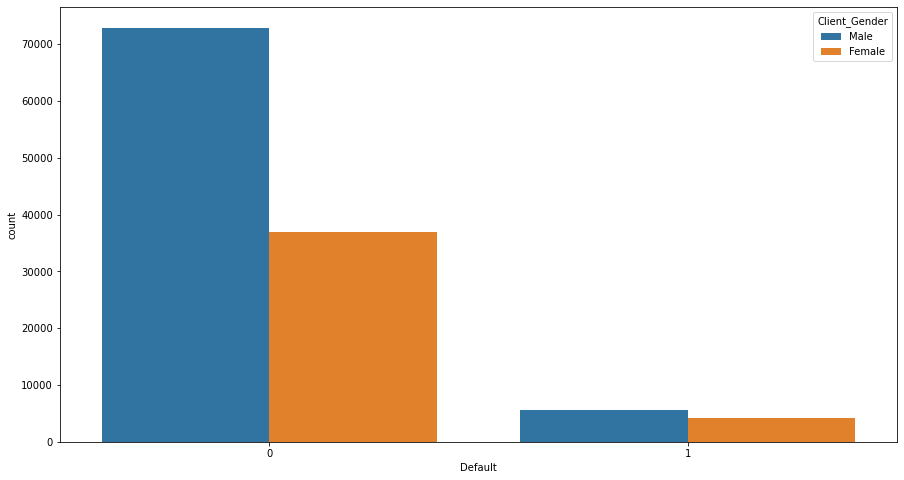

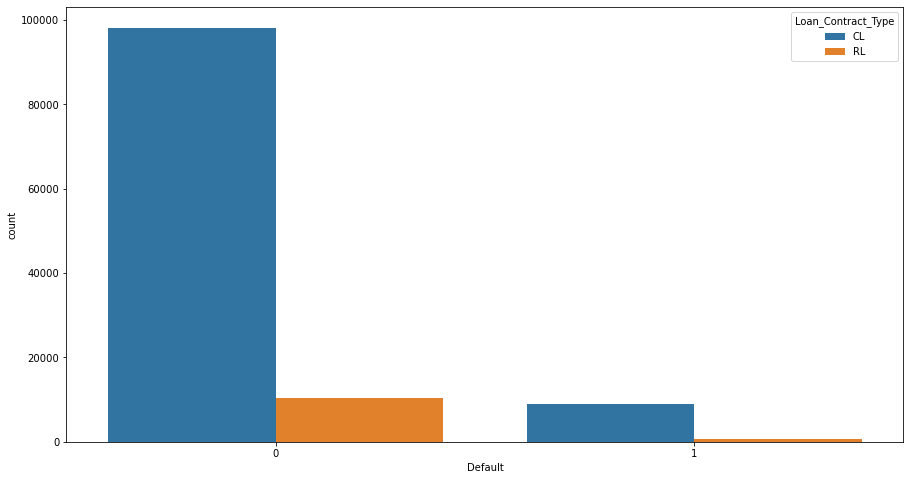

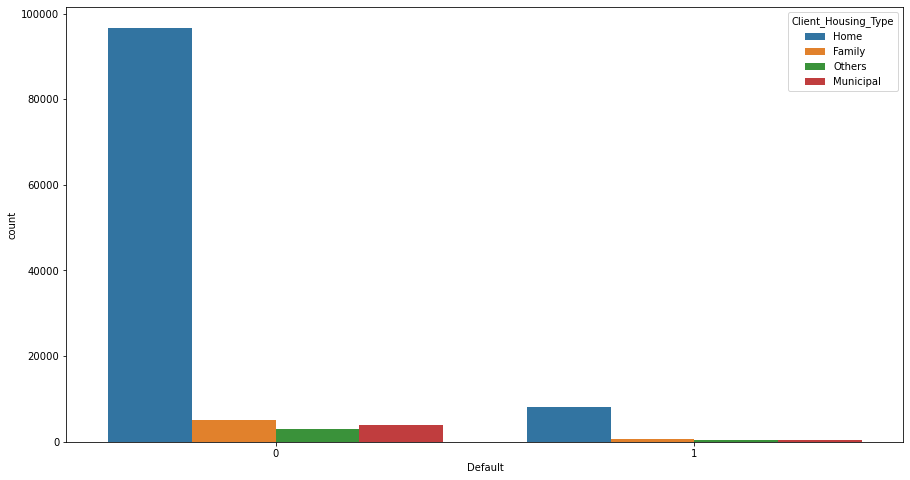

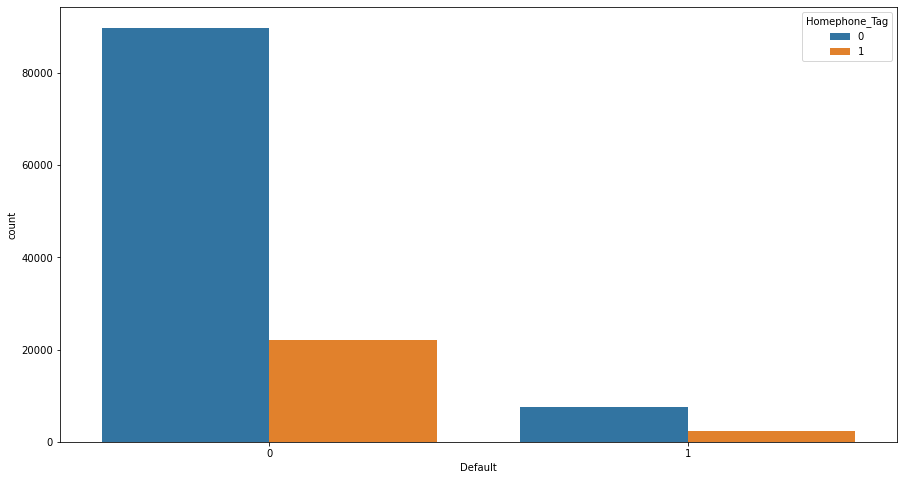

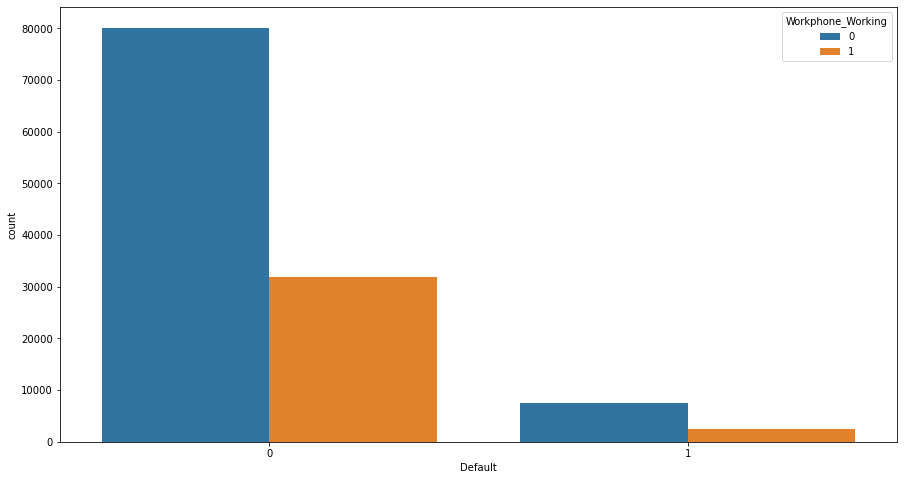

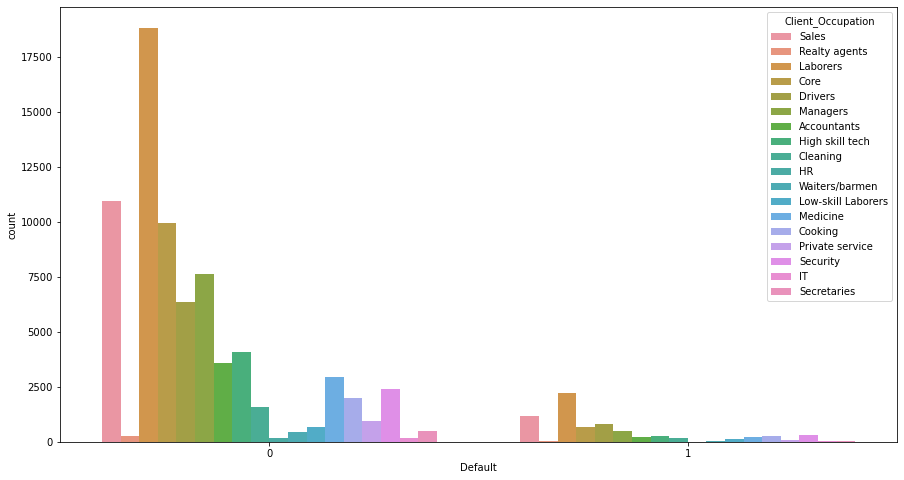

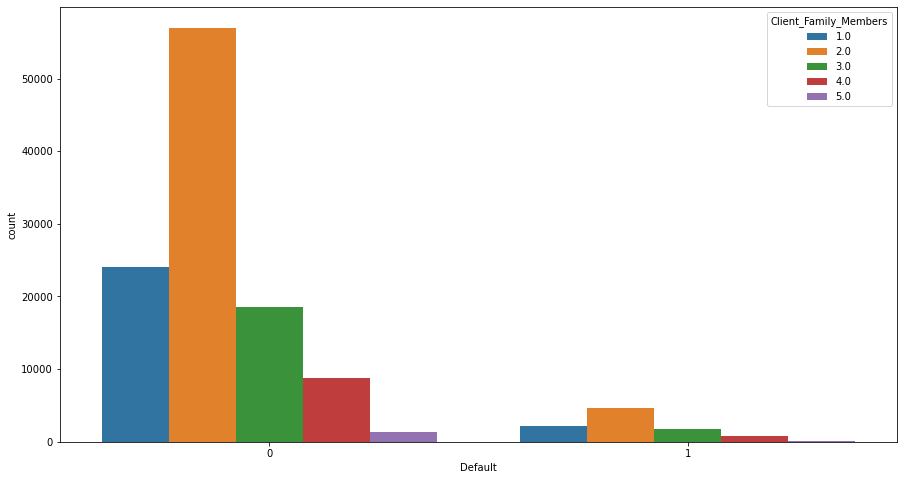

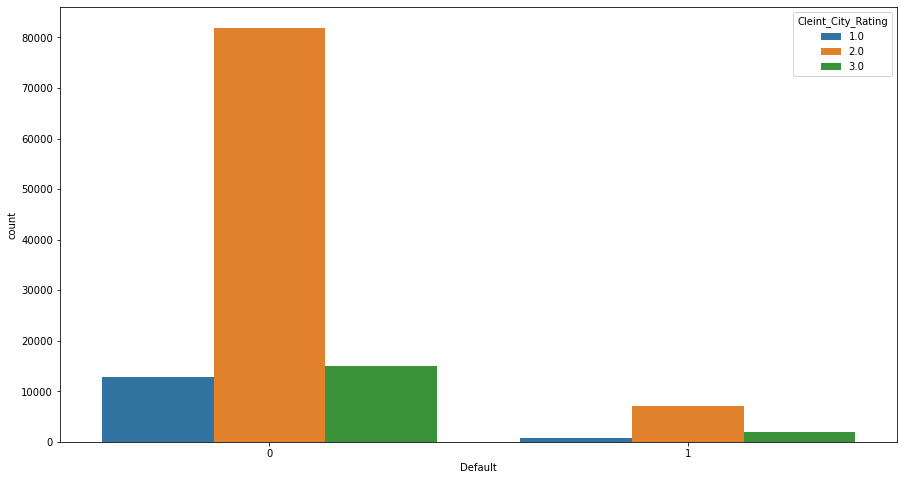

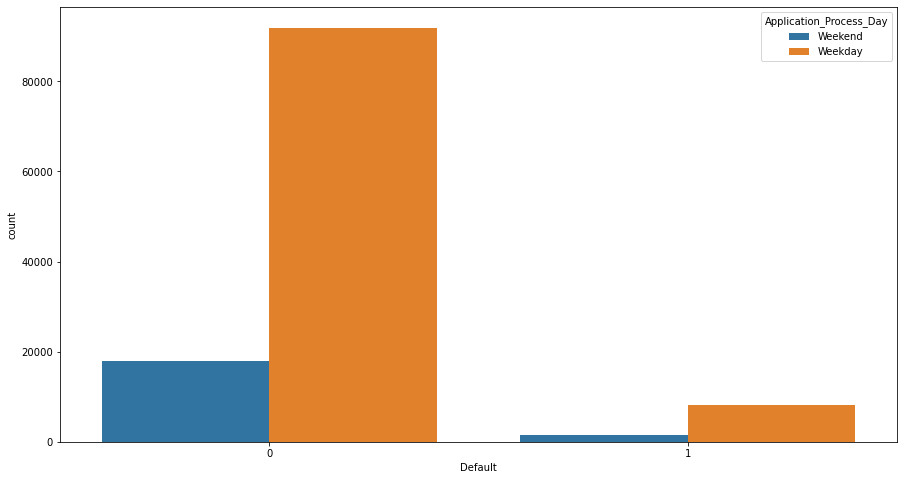

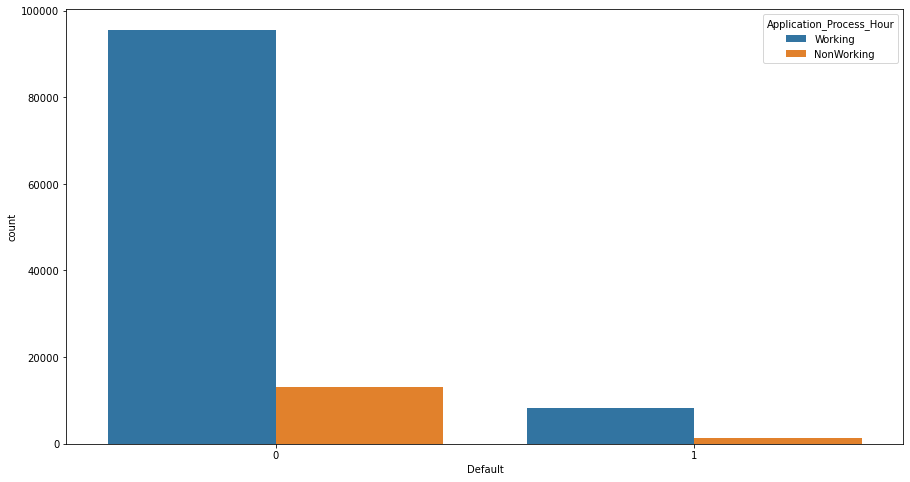

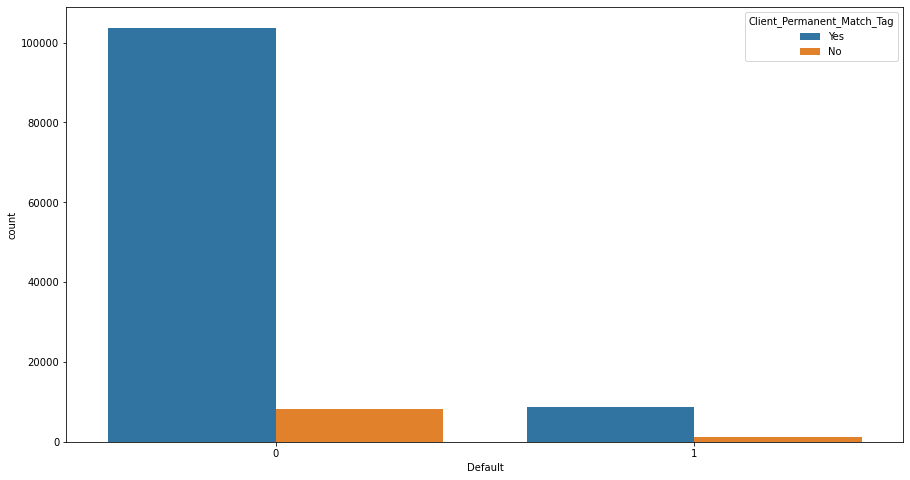

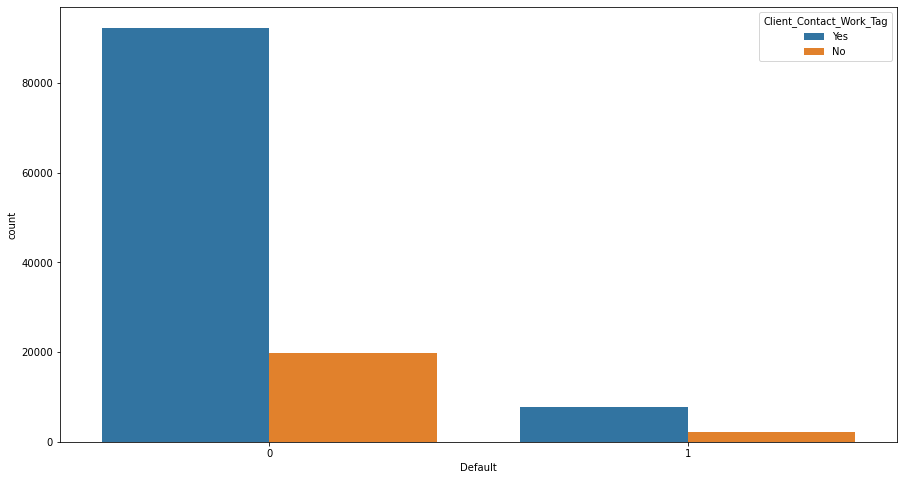

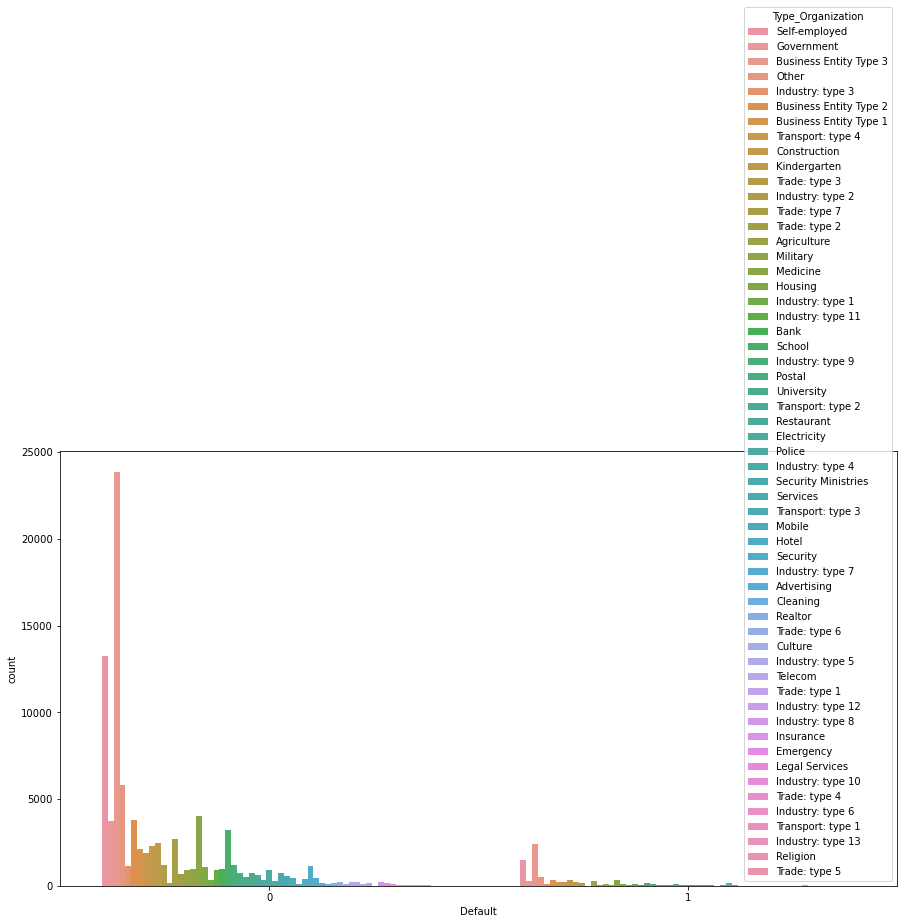

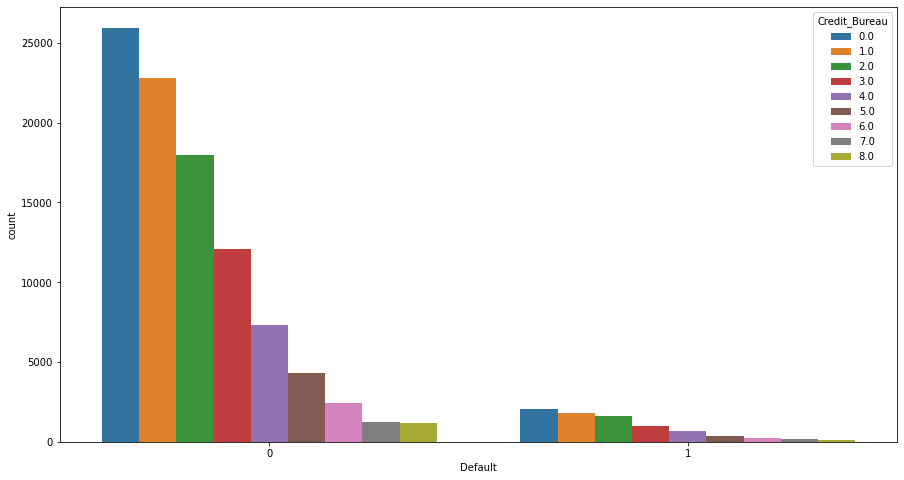

In [16]:
for i in [ 'Car_Owned'               ,  'Bike_Owned'              ,    'Active_Loan'              ,
           'House_Own'               ,  'Child_Count'             ,    'Accompany_Client'         , 
           'Client_Income_Type'      ,  'Client_Education'        ,    'Client_Marital_Status'    ,
           'Client_Gender'           ,  'Loan_Contract_Type'      ,    'Client_Housing_Type'      ,
           'Homephone_Tag'           ,  'Workphone_Working'       ,    'Client_Occupation'        , 
           'Client_Family_Members'   ,  'Cleint_City_Rating'      ,    'Application_Process_Day'  ,
           'Application_Process_Hour',  'Client_Permanent_Match_Tag' , 'Client_Contact_Work_Tag'  , 
           'Type_Organization'       ,  'Credit_Bureau'     ]:
    
    plt.figure (figsize=(12,5))

    sns.countplot (x ="Default" , hue =i  , data =train );

### **2.2.2 - For Numeric Cols**

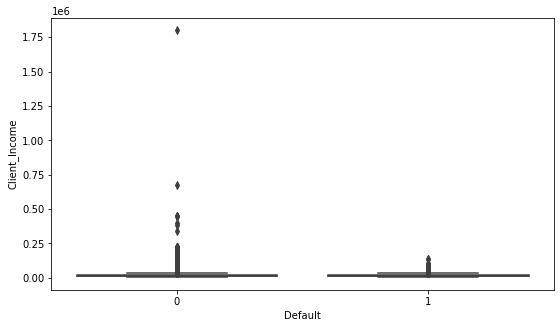

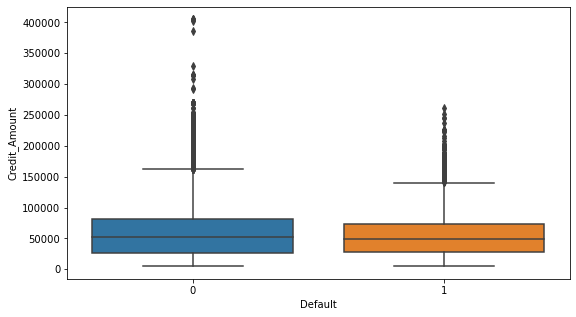

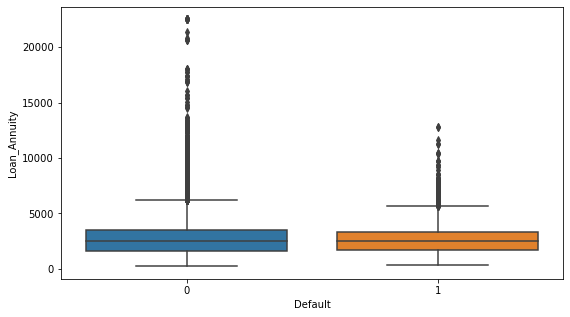

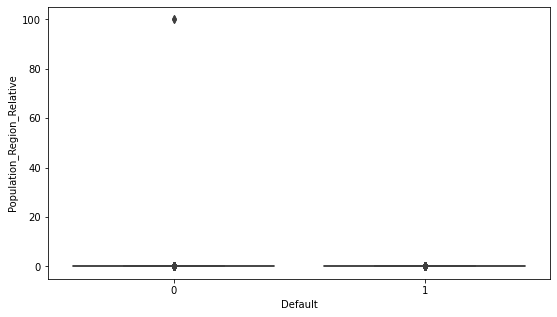

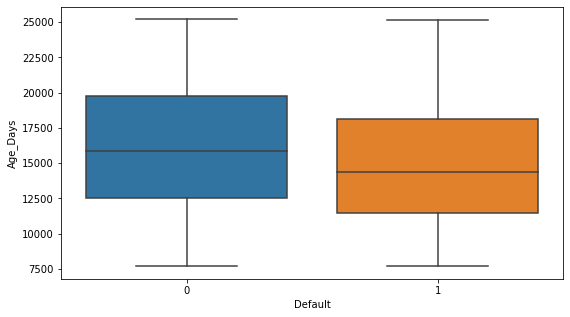

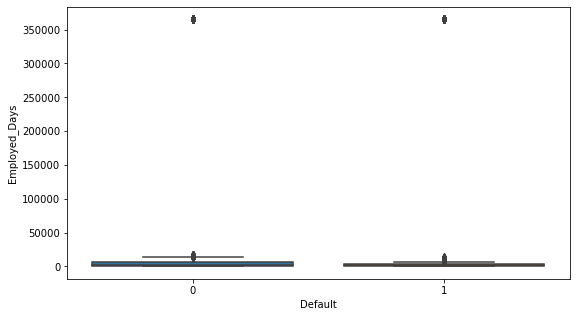

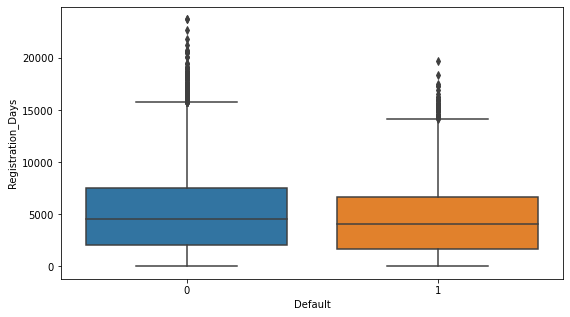

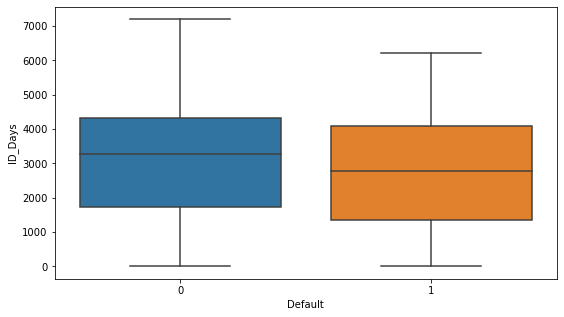

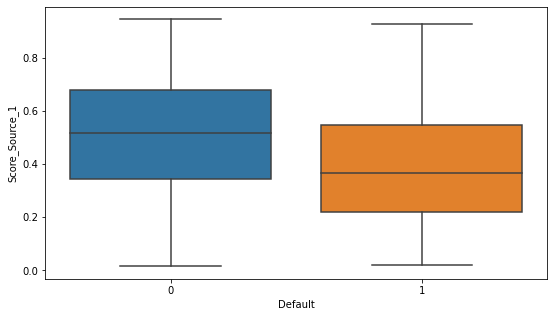

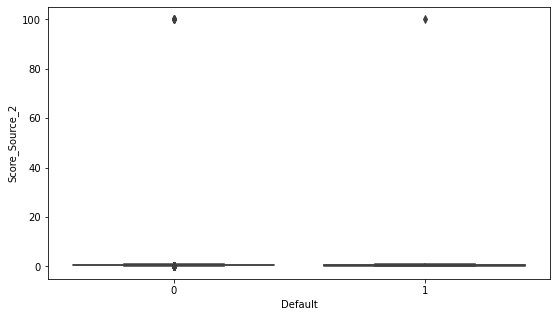

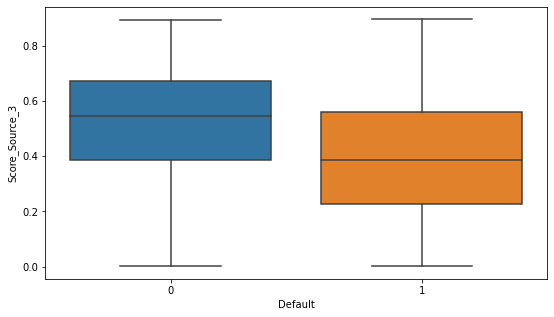

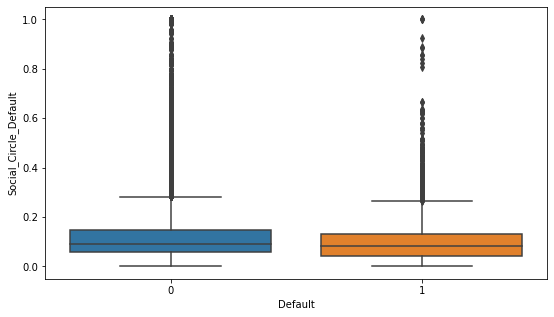

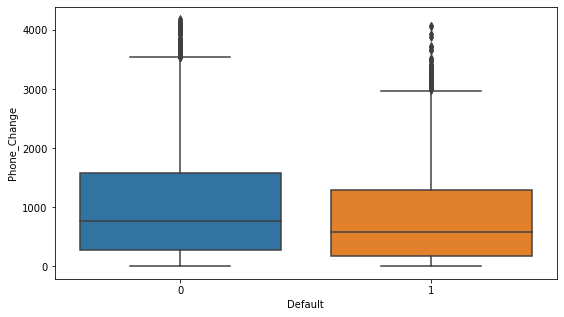

In [17]:
for i in [  'Client_Income'   , 'Credit_Amount'  , 'Loan_Annuity'       , 'Population_Region_Relative' , 
            'Age_Days'        , 'Employed_Days'  , 'Registration_Days'  , 'ID_Days'                    , 
            'Score_Source_1'  , 'Score_Source_2' , 'Score_Source_3'     , 'Social_Circle_Default'      ,  
            'Phone_Change' ]:
    
    plt.figure (figsize=(9,5))

    sns.boxplot ( x='Default', y=i , data =train ) ;

## **Data mods**

In [18]:
train ['Population_Region_Relative']  .replace ( { 100    : 1.00 }  , inplace=True )
train ['Score_Source_2']              .replace ( { 100    : 1.00 }  , inplace=True )
train ['Employed_Days']               .replace ( { 365243 : 365  }  , inplace=True )

train.loc    [ train ['Client_Income'] >= 450000  , 'Client_Income' ]      = 450000
train.loc    [ train ['Loan_Annuity']  >= 19000   , 'Loan_Annuity'  ]      = 19000

In [19]:
test ['Population_Region_Relative']  .replace ( { 100    : 1.00 }  , inplace=True )
test ['Score_Source_2']              .replace ( { 100    : 1.00 }  , inplace=True )
test ['Employed_Days']               .replace ( { 365243 : 365  }  , inplace=True )

test.loc    [ test ['Client_Income'] >= 450000   , 'Client_Income' ]      = 450000
test.loc    [ test ['Loan_Annuity']  >= 19000    , 'Loan_Annuity'  ]      = 19000

<a id='section_13'></a>
# **Part 3 - NaN** 

## **3.1 - Checking**

In [20]:
print ( 'NAN % on train data :\n',   np.round  (  train.isnull().sum() * 100   /  len(train)  ,   2 )      )
print ( '\n')
print ( 'NAN % on test data  :\n',   np.round  (  test.isnull().sum() * 100   /   len(test)   ,   2 )      )

NAN % on train data :
 Client_Income                  2.97
Car_Owned                      2.94
Bike_Owned                     2.97
Active_Loan                    2.98
House_Own                      3.00
Child_Count                    2.99
Credit_Amount                  2.98
Loan_Annuity                   3.96
Accompany_Client               1.43
Client_Income_Type             3.04
Client_Education               2.99
Client_Marital_Status          2.85
Client_Gender                  1.98
Loan_Contract_Type             3.00
Client_Housing_Type            3.03
Population_Region_Relative     3.99
Age_Days                       2.97
Employed_Days                  3.01
Registration_Days              2.98
ID_Days                        4.91
Own_House_Age                 65.73
Homephone_Tag                  0.00
Workphone_Working              0.00
Client_Occupation             34.00
Client_Family_Members          1.98
Cleint_City_Rating             1.98
Application_Process_Day        1.99
Appli

## **3.2 - Treatment**

** Dropping **

In [21]:
train.drop   ( [ 'Own_House_Age'  , 'Client_Occupation' ,  'Type_Organization', 
                'Score_Source_1'  , 'Score_Source_3'    ,  'Social_Circle_Default'  , 'Credit_Bureau']   , 
                axis=1 ,  inplace = True)

test.drop    ( [ 'Own_House_Age'  , 'Client_Occupation' ,  'Type_Organization', 
                 'Score_Source_1' , 'Score_Source_3'    ,  'Social_Circle_Default'  , 'Credit_Bureau']   , 
                 axis=1 ,  inplace = True)

** Imputing **

In [22]:
for i in [  'Client_Income'   , 'Credit_Amount'  , 'Loan_Annuity'       , 'Population_Region_Relative' , 
            'Age_Days'        , 'Employed_Days'  , 'Registration_Days'  , 'ID_Days'                    , 
            'Score_Source_2'  , 'Phone_Change' ]:
    
    train[i].fillna ( train[i].median(), inplace=True)
    test [i].fillna ( test [i].median(), inplace=True)
    

<a id='section_14'></a>
# **Part 4 - Encode , Impute , Transform** 

## **4.1 - Nominal Encode**

In [23]:
train = pd.get_dummies ( train, 
                      columns    = [ 'Client_Permanent_Match_Tag' , 'Client_Contact_Work_Tag' , 
                                     'Application_Process_Day' , 'Application_Process_Hour' ,
                                     'Client_Gender'              , 'Loan_Contract_Type'      , 
                                     'Accompany_Client' , 'Client_Income_Type' , 'Client_Education' , 
                                     'Client_Marital_Status', 'Client_Housing_Type']  ,
                      drop_first = True)



test = pd.get_dummies ( test, 
                      columns    = [ 'Client_Permanent_Match_Tag' , 'Client_Contact_Work_Tag' , 
                                     'Application_Process_Day'    , 'Application_Process_Hour' ,
                                     'Client_Gender'              , 'Loan_Contract_Type'      , 
                                     'Accompany_Client'           , 'Client_Income_Type' , 
                                     'Client_Education'           , 'Client_Marital_Status', 
                                     'Client_Housing_Type' ]  ,
                      drop_first = True)

## **4.2 - KNN Impute**

In [24]:
from sklearn.impute import KNNImputer

imputer = KNNImputer   (n_neighbors = 5)

train   = pd.DataFrame (imputer.fit_transform(train) , columns = train.columns) 
test    = pd.DataFrame (imputer.fit_transform(test)  , columns = test.columns) 

## **4.3 - Scale Transform**

As we are using Random Forest Classifier , so we dont have to scale transform the data

<a id='section_15'></a>
# **Part 5 - Feature Selection**

In [25]:
x =  train.drop ( ['Default'] , axis=1 )
y =  train ['Default']

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit ( x , y )

RandomForestClassifier()

In [27]:
table  =  pd.DataFrame  (  data = { 'Features' : x.columns  , 'Importance ratio' : rf.feature_importances_.tolist() }  )

table.sort_values       (  by=['Importance ratio'] , ascending=False , inplace=True )

print (table.head(50))

                            Features  Importance ratio
17                    Score_Source_2          0.103185
9                           Age_Days          0.081881
11                 Registration_Days          0.081113
12                           ID_Days          0.080798
7                       Loan_Annuity          0.074876
10                     Employed_Days          0.073170
18                      Phone_Change          0.071157
6                      Credit_Amount          0.070891
8         Population_Region_Relative          0.060588
0                      Client_Income          0.058303
15             Client_Family_Members          0.020350
5                        Child_Count          0.015273
3                        Active_Loan          0.015010
2                         Bike_Owned          0.014042
16                Cleint_City_Rating          0.013305
4                          House_Own          0.012668
1                          Car_Owned          0.011980
14        

In [28]:
train.drop ( [ 'Workphone_Working', 'Homephone_Tag' , 'Client_Gender_Male' , 'Client_Contact_Work_Tag_Yes' , 
              'Client_Income_Type_Service' , 'Application_Process_Day_Weekend' ,'Application_Process_Hour_Working', 
              'Client_Marital_Status_M' ,'Accompany_Client_Relative' , 'Client_Housing_Type_Home' , 
              'Client_Education_Secondary' , 'Client_Marital_Status_S','Client_Permanent_Match_Tag_Yes' ,
              'Loan_Contract_Type_RL','Accompany_Client_Partner','Client_Housing_Type_Municipal',
              'Client_Housing_Type_Others','Client_Income_Type_Govt Job','Client_Education_Others',
              'Client_Marital_Status_W','Accompany_Client_Others','Client_Income_Type_Retired', 
              'Client_Income_Type_Others' ] , 
              axis=1 , inplace=True )


test.drop ( [ 'Workphone_Working' , 'Homephone_Tag' , 'Client_Gender_Male' , 'Client_Contact_Work_Tag_Yes' , 
              'Client_Income_Type_Service' , 'Application_Process_Day_Weekend' ,
              'Application_Process_Hour_Working' , 'Client_Marital_Status_M' ,
              'Accompany_Client_Relative' , 'Client_Housing_Type_Home' , 'Client_Education_Secondary' , 
              'Client_Marital_Status_S','Client_Permanent_Match_Tag_Yes' ,'Loan_Contract_Type_RL',
              'Accompany_Client_Partner','Client_Housing_Type_Municipal',
              'Client_Housing_Type_Others','Client_Income_Type_Govt Job','Client_Education_Others',
              'Client_Marital_Status_W','Accompany_Client_Others','Client_Income_Type_Retired', 
              'Client_Income_Type_Others', 'Client_Marital_Status_Unknown', 'Client_Education_junior secondary'] , 
               axis=1 , inplace=True )

<a id='section_16'></a>
# **Part 6 - Model Building**

In [38]:
from  sklearn.model_selection   import  train_test_split , KFold , RandomizedSearchCV , cross_val_score
from  sklearn.metrics           import  f1_score         

from  sklearn.ensemble          import  RandomForestClassifier

x =  train.drop ( ['Default'] , axis=1 )
y =  train ['Default']

## **6.1 - SMOTE**

In [39]:
from    imblearn.combine            import    SMOTEENN

cs   =  SMOTEENN ()

X,Y  =  cs.fit_resample(x,y)

X.shape

(182715, 17)

In [40]:
x_train , x_test , y_train , y_test  =   train_test_split ( X , Y , test_size = 0.3 , random_state = 0 )

## **6.2 - RFC**

In [41]:
clf      =   RandomForestClassifier ( n_estimators=400 , criterion='entropy', max_depth=40 , min_samples_leaf=1 , random_state=0 )

clf.fit      ( x_train , y_train )

y_pred   =   clf.predict ( x_test )

score    =   f1_score ( y_pred , y_test )

print ('F1 score : ' , round(score,2)  )

F1 score :  0.96


## **6.3 - Fitting final model into entire data**

In [42]:
clf.fit ( X , Y )

RandomForestClassifier(criterion='entropy', max_depth=40, n_estimators=400,
                       random_state=0)

<a id='section_17'></a>
# **Part 7 - Submission**

In [43]:
ls          =  test.columns.tolist()

in_data     =  test [ls]

out_data    =  clf.predict (in_data)

In [44]:
testfile    =   pd.read_csv ('dataset/data_test.csv')
submit      =   pd.DataFrame()

In [45]:
submit ['ID']        =  testfile ['ID']
submit ['Default']   =  out_data

submit  =  submit.sort_values ( by =['ID'] )

# submit.to_csv  ( 'Submission_File.csv' , index = False , header = True )